In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

### Randomly generate x from a uniform distribution, then define y relationships (linear, quadratic and log)

In [2]:
# Generating x
x = np.random.uniform(size = 10000, low = -5, high = 5)
x = np.asarray(sorted(x))

# Defining y's from x
lin_y = 5*x
quad_y = x**2
log_y = np.sin(x)*np.log(np.abs(x) + 1)

### Fit linear regressions and neural networks for all three relationships

In [3]:
# Linear models
# Fitting linear models
linear_fit_on_lin_y = LinearRegression().fit(x.reshape(-1, 1), lin_y)
linear_fit_on_quad_y = LinearRegression().fit(x.reshape(-1, 1), quad_y)
linear_fit_on_log_y = LinearRegression().fit(x.reshape(-1, 1), log_y)
# Generating predictions from linear models
linear_fit_on_lin_y_pred = linear_fit_on_lin_y.predict(x.reshape(-1, 1))
linear_fit_on_quad_y_pred = linear_fit_on_quad_y.predict(x.reshape(-1, 1))
linear_fit_on_log_y_pred = linear_fit_on_log_y.predict(x.reshape(-1, 1))

# Neural networks with ReLU, no regularization, 32 hidden units in 1 hidden layer
# Fitting neural networks
nn_fit_on_lin_y = MLPRegressor(hidden_layer_sizes = (32, ), alpha = 0).fit(x.reshape(-1, 1), lin_y)
nn_fit_on_quad_y = MLPRegressor(hidden_layer_sizes = (32, ), alpha = 0).fit(x.reshape(-1, 1), quad_y)
nn_fit_on_log_y = MLPRegressor(hidden_layer_sizes = (32, ), alpha = 0).fit(x.reshape(-1, 1), log_y)
# Generating predictions from neural networks
nn_fit_on_lin_y_pred = nn_fit_on_lin_y.predict(x.reshape(-1, 1))
nn_fit_on_quad_y_pred = nn_fit_on_quad_y.predict(x.reshape(-1, 1))
nn_fit_on_log_y_pred = nn_fit_on_log_y.predict(x.reshape(-1, 1))

### View the model preformances

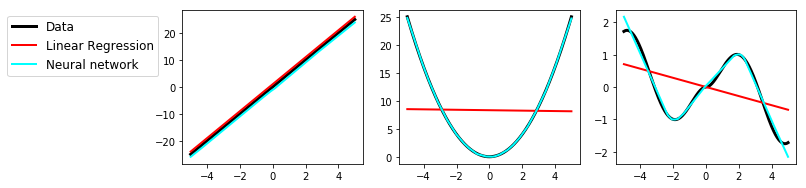

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(11, 8.5/3))

axs[0].plot(x, lin_y, color = 'black', linewidth = 3)
axs[0].plot(x, linear_fit_on_lin_y_pred + 1, color = 'red', linewidth = 2)
axs[0].plot(x, nn_fit_on_lin_y_pred - 1, color = 'cyan', linewidth = 2)

axs[1].plot(x, quad_y, color = 'black', linewidth = 3)
axs[1].plot(x, linear_fit_on_quad_y_pred, color = 'red', linewidth = 2)
axs[1].plot(x, nn_fit_on_quad_y_pred, color = 'cyan', linewidth = 2)

axs[2].plot(x, log_y, color = 'black', linewidth = 3, label = 'Data')
axs[2].plot(x, linear_fit_on_log_y_pred, color = 'red', linewidth = 2, label = 'Linear Regression')
axs[2].plot(x, nn_fit_on_log_y_pred, color = 'cyan', linewidth = 2, label = 'Neural network')


axs[2].legend(loc=1, bbox_to_anchor=(-2.5, 1), prop={'size': 12})

plt.savefig('nn_demo1.png', height = 8, width = 8, units = 'in', dpi = 300, bbox_inches='tight');